In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab
import timeit


start = timeit.default_timer()


def kmers(read, k,d):
    KList=[]
    KList2=[]
    PairedKmers=[]
    num_kmers = len(read) - k + 1
    for i in range(num_kmers):
        kmer = read[i:i+k]
        if i==0:
            KList.append(kmer)
        else:
            KList.append(kmer) 
            
    num_kmers1 = len(read) - k + 1
    for i in range(k+d,num_kmers1):
        kmer = read[i:i+k]
        if i==0:
            KList2.append(kmer)
        else:
            KList2.append(kmer)
    
    KList1=KList[0:len(KList2)]
    
    for i in range(len(KList2)):
        PairedKmers.append([KList1[i],KList2[i]])
    
    return KList1,KList2,PairedKmers

def sortkmer(kmerlist):
    tempkmerlist=kmerlist
    for i in range(len(tempkmerlist) - 1):
        for j in range(i + 1, len(tempkmerlist)):
            if tempkmerlist[i][0] > tempkmerlist[j][0]:
                temp = tempkmerlist[i]
                tempkmerlist[i] = tempkmerlist[j]
                tempkmerlist[j] = temp
    return tempkmerlist

# input1="TAATGCCATGGGATGTT"
input1="TCTCCATGCATTTGGTATTTT"
# input1="ACCCCCACGGGAAACAGCAGTGATTAACCTTTAGCAATAAACGAAAGTTTAACTAAGCTATACTAACCCCAGGGTTGGTCAATTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAACTGGGATTAGATACCCCACTATGCTTAGCCCTAAACCTCAACAGTTAAATCAACAAAACTGCTCGCCAGAACACTACGAGCCACAGCTTAAAACTCAAAGGACCTGGCGGTGCTTCATATCCCTCTAGAGG"
k=5
d=1
Kmers=kmers(input1,k,d)

print(f"KmerList1={Kmers[0]}")
print(" ")
print(f"KmerList2={Kmers[1]}")
print()
print(f"PairedKmers={Kmers[2]}")
print()
# lexicographic = sortkmer(Kmers[2])
# print(f'lexiographic = {lexicographic}')

KmerList1=['TCTCC', 'CTCCA', 'TCCAT', 'CCATG', 'CATGC', 'ATGCA', 'TGCAT', 'GCATT', 'CATTT', 'ATTTG', 'TTTGG']
 
KmerList2=['TGCAT', 'GCATT', 'CATTT', 'ATTTG', 'TTTGG', 'TTGGT', 'TGGTA', 'GGTAT', 'GTATT', 'TATTT', 'ATTTT']

PairedKmers=[['TCTCC', 'TGCAT'], ['CTCCA', 'GCATT'], ['TCCAT', 'CATTT'], ['CCATG', 'ATTTG'], ['CATGC', 'TTTGG'], ['ATGCA', 'TTGGT'], ['TGCAT', 'TGGTA'], ['GCATT', 'GGTAT'], ['CATTT', 'GTATT'], ['ATTTG', 'TATTT'], ['TTTGG', 'ATTTT']]



In [26]:
def CreatePairedKmers(PairedKmerList):
    NodesListOfLists=[]
    for edge in PairedKmerList:
        NodesListOfLists.append([edge[0][:k-1],edge[1][:k-1]])
    NodesListOfLists.append([PairedKmerList[-1][0][1:k],PairedKmerList[-1][1][1:k]])
    return NodesListOfLists
ListOfPairedNodes = CreatePairedKmers(Kmers[2])
print(f"Nodes = {ListOfPairedNodes}")

Nodes = [['TCTC', 'TGCA'], ['CTCC', 'GCAT'], ['TCCA', 'CATT'], ['CCAT', 'ATTT'], ['CATG', 'TTTG'], ['ATGC', 'TTGG'], ['TGCA', 'TGGT'], ['GCAT', 'GGTA'], ['CATT', 'GTAT'], ['ATTT', 'TATT'], ['TTTG', 'ATTT'], ['TTGG', 'TTTT']]


In [27]:
def CreateEdgesList(ListOfPairedNodes):
    AlternateRep=[]
    EdgeList=[]
    for i in range((len(ListOfPairedNodes))):
        AlternateRep.append(ListOfPairedNodes[i][0]+','+ListOfPairedNodes[i][1])
        
    for i in range(len(ListOfPairedNodes)-1):
        EdgeList.append([AlternateRep[i],AlternateRep[i+1]])
    return EdgeList
EdgeList=CreateEdgesList(ListOfPairedNodes)
EdgeList

[['TCTC,TGCA', 'CTCC,GCAT'],
 ['CTCC,GCAT', 'TCCA,CATT'],
 ['TCCA,CATT', 'CCAT,ATTT'],
 ['CCAT,ATTT', 'CATG,TTTG'],
 ['CATG,TTTG', 'ATGC,TTGG'],
 ['ATGC,TTGG', 'TGCA,TGGT'],
 ['TGCA,TGGT', 'GCAT,GGTA'],
 ['GCAT,GGTA', 'CATT,GTAT'],
 ['CATT,GTAT', 'ATTT,TATT'],
 ['ATTT,TATT', 'TTTG,ATTT'],
 ['TTTG,ATTT', 'TTGG,TTTT']]

         ---   Paired DE-BRUIJN Graph   ---         

nodes = ['TCTC,TGCA', 'CTCC,GCAT', 'TCCA,CATT', 'CCAT,ATTT', 'CATG,TTTG', 'ATGC,TTGG', 'TGCA,TGGT', 'GCAT,GGTA', 'CATT,GTAT', 'ATTT,TATT', 'TTTG,ATTT', 'TTGG,TTTT']
 
edges = [('TCTC,TGCA', 'CTCC,GCAT'), ('CTCC,GCAT', 'TCCA,CATT'), ('TCCA,CATT', 'CCAT,ATTT'), ('CCAT,ATTT', 'CATG,TTTG'), ('CATG,TTTG', 'ATGC,TTGG'), ('ATGC,TTGG', 'TGCA,TGGT'), ('TGCA,TGGT', 'GCAT,GGTA'), ('GCAT,GGTA', 'CATT,GTAT'), ('CATT,GTAT', 'ATTT,TATT'), ('ATTT,TATT', 'TTTG,ATTT'), ('TTTG,ATTT', 'TTGG,TTTT')]


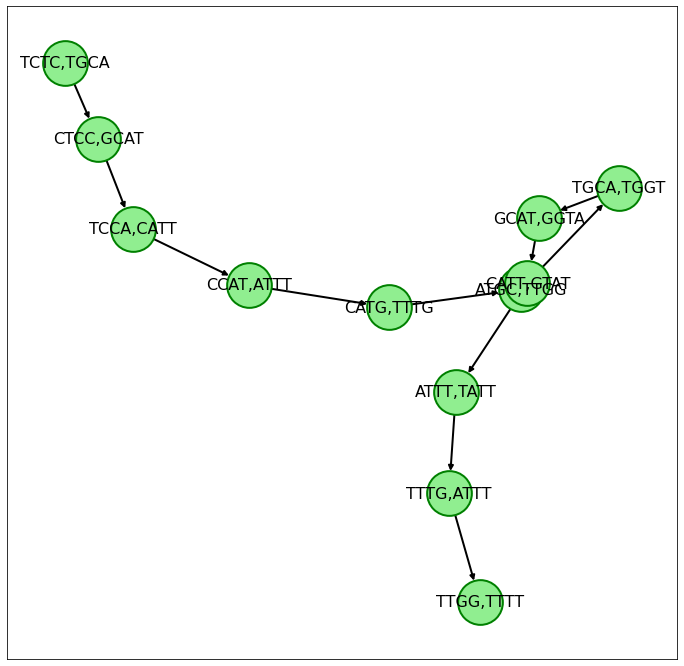

In [28]:
G = nx.MultiDiGraph()
G.add_edges_from(EdgeList)
totalNodes=G.nodes()
pos = nx.spring_layout(G)
options = {
    "font_size": 16,
    "node_size": 2000,
    "node_color": "lightgreen",
    "edgecolors": "green",
    "linewidths": 2,
    "width": 2,
    "edge_vmin":5
}
nodes=G.nodes()
edges=G.edges()
print("         ---   Paired DE-BRUIJN Graph   ---         ")
print()
print(f"nodes = {nodes()}")
print(" ")
print(f"edges = {edges}")

plt.figure(2,figsize=(12,12))
nx.draw_networkx(G,pos,**options)
plt.show()

In [29]:
# converting list of lists in dictionary format
def ConvertListToDict(List):
    Dict={}
    for i in List:
        if i[0] in Dict.keys():
            newList = Dict[i[0]]
            newList.extend([i[1]])
            Dict.update({i[0]: newList})
        else:
            Dict[i[0]] = [i[1]]
    return Dict

Output=ConvertListToDict(edges)


In [30]:
def eulerian_cycle(edge_dict):
    tempo1=list(edge_dict.keys())
    current_node = tempo1[0]
    path = [current_node]
    while True:
        path.append(edge_dict[current_node][0])

        if len(edge_dict[current_node]) == 1:
            del edge_dict[current_node]
        else:
            edge_dict[current_node] = edge_dict[current_node][1:]

        if path[-1] in edge_dict:
            current_node = path[-1]
        else:
            break
    while len(edge_dict) > 0:
        for i in range(len(path)):
            if path[i] in edge_dict:
                current_node = path[i]
                cycle = [current_node]
                while True:
                    cycle.append(edge_dict[current_node][0])

                    if len(edge_dict[current_node]) == 1:
                        del edge_dict[current_node]
                    else:
                        edge_dict[current_node] = edge_dict[current_node][1:]

                    if cycle[-1] in edge_dict:
                        current_node = cycle[-1]
                    else:
                        break

                path = path[:i] + cycle + path[i+1:]
                break
    return path

print()
print(" Final Eulerian Path from the de-bruijn graph: ")
print()
path = eulerian_cycle(Output)
print ('->'.join(map(str,path)))
print(path)


 Final Eulerian Path from the de-bruijn graph: 

TCTC,TGCA->CTCC,GCAT->TCCA,CATT->CCAT,ATTT->CATG,TTTG->ATGC,TTGG->TGCA,TGGT->GCAT,GGTA->CATT,GTAT->ATTT,TATT->TTTG,ATTT->TTGG,TTTT
['TCTC,TGCA', 'CTCC,GCAT', 'TCCA,CATT', 'CCAT,ATTT', 'CATG,TTTG', 'ATGC,TTGG', 'TGCA,TGGT', 'GCAT,GGTA', 'CATT,GTAT', 'ATTT,TATT', 'TTTG,ATTT', 'TTGG,TTTT']


In [31]:
def reconstructString(List):
    String=""
    String=String+List[0][:1]
    for i in range(1,len(List)):
        String=String+List[i][0]

    for i in range(len(List)-(k+1),len(List)-1):
        String=String+List[i][k]
    String=String+List[len(List)-1][k:]
    return String 

In [32]:
print(f"    Original String   : {input1}")
print(f" Reconstructed String : {reconstructString(path)}")
print()
stop = timeit.default_timer()
print('Run Time: ', stop - start)


    Original String   : TCTCCATGCATTTGGTATTTT
 Reconstructed String : TCTCCATGCATTTGGTATTTT

Run Time:  4.471588700005668
